In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('starbucks.csv')
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

# Data Cleaning 

In [12]:
# Check missing values in each column
df.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

In [14]:
# First, remove spaces in column names
df.columns = df.columns.str.strip()

# Convert 'Caffeine (mg)' to numeric
df['Caffeine (mg)'] = pd.to_numeric(df['Caffeine (mg)'], errors='coerce')

# Fill missing value with mean (correct way)
df['Caffeine (mg)'] = df['Caffeine (mg)'].fillna(df['Caffeine (mg)'].mean())

# Check again
df.isnull().sum()


Beverage_category          0
Beverage                   0
Beverage_prep              0
Calories                   0
Total Fat (g)              0
Trans Fat (g)              0
Saturated Fat (g)          0
Sodium (mg)                0
Total Carbohydrates (g)    0
Cholesterol (mg)           0
Dietary Fibre (g)          0
Sugars (g)                 0
Protein (g)                0
Vitamin A (% DV)           0
Vitamin C (% DV)           0
Calcium (% DV)             0
Iron (% DV)                0
Caffeine (mg)              0
dtype: int64

In [17]:
# Check for duplicate rows
df.duplicated().sum()

0

In [19]:
df.shape

(242, 18)

In [20]:
# Get basic statistical description (for numeric columns)
df.describe()

,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Caffeine (mg)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512,89.520548
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659,61.560774
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000,70.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000,89.520548
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000,130.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000,410.000000


# Exploratory Data Analysis

In [21]:
# Check all column names
df.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
       'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)'],
      dtype='object')

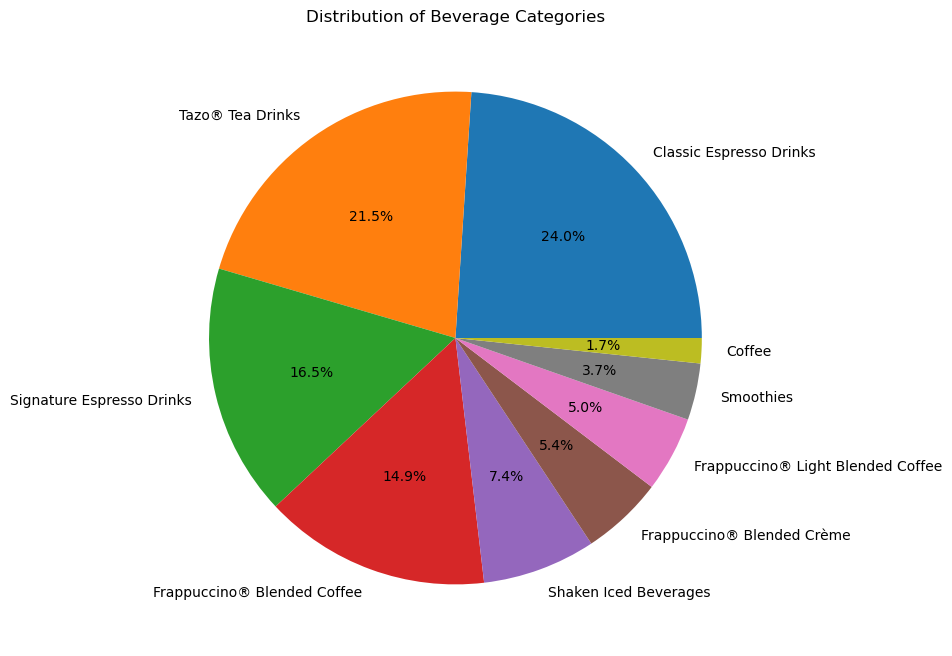

In [22]:
# Pie chart of Beverage Categories
plt.figure(figsize=(8,8))
df['Beverage_category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Beverage Categories')
plt.ylabel('')
plt.show()


Shows percentage of each beverage category (like Coffee, Tea, etc.). 

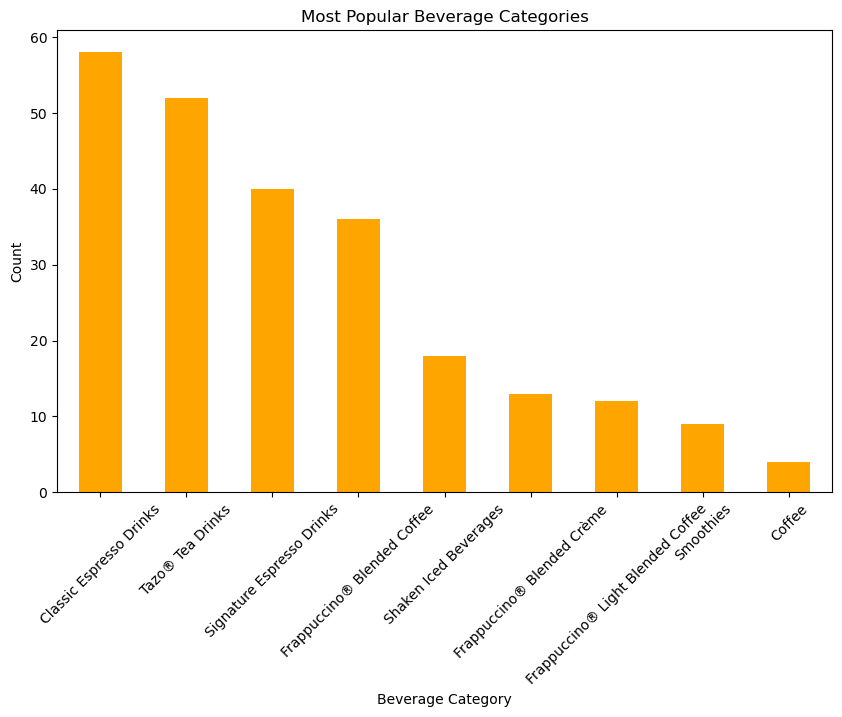

In [31]:
# Beverage Category Popularity
plt.figure(figsize=(10,6))
df['Beverage_category'].value_counts().plot(kind='bar', color='orange')
plt.title('Most Popular Beverage Categories')
plt.xlabel('Beverage Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


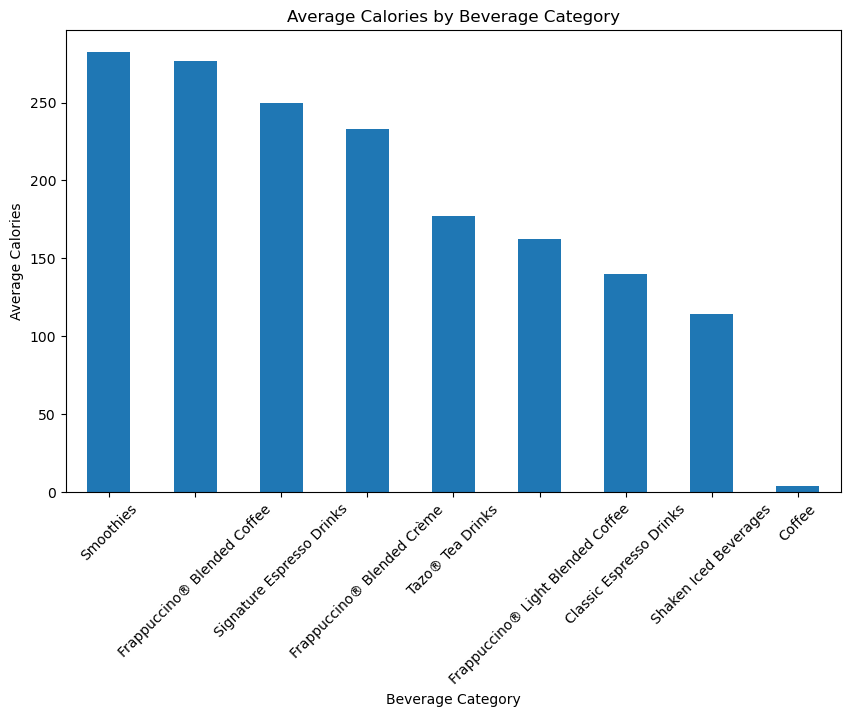

In [23]:
# Bar plot of Average Calories per Beverage Category
plt.figure(figsize=(10,6))
df.groupby('Beverage_category')['Calories'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Calories by Beverage Category')
plt.xlabel('Beverage Category')
plt.ylabel('Average Calories')
plt.xticks(rotation=45)
plt.show()

Shows which category (e.g., Frappuccino) is the most calorie-heavy on average

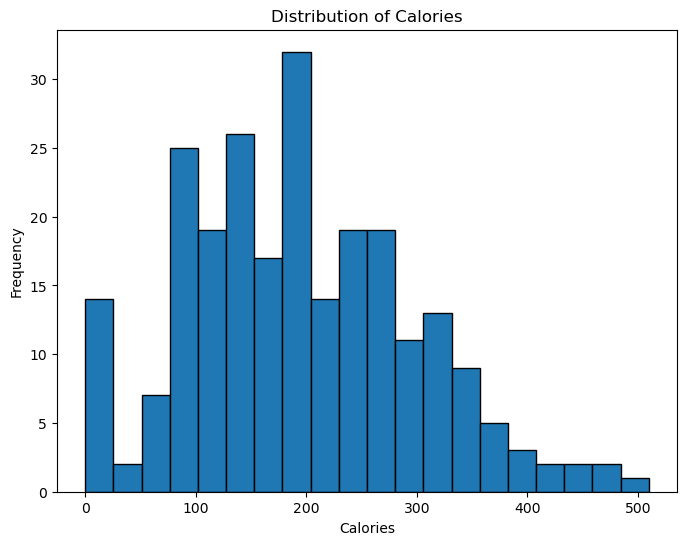

In [25]:
# Histogram of Calories
plt.figure(figsize=(8,6))
plt.hist(df['Calories'], bins=20, edgecolor='black')
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()


Shows how calories are spread across drinks (e.g., most drinks between 100–300 calories)

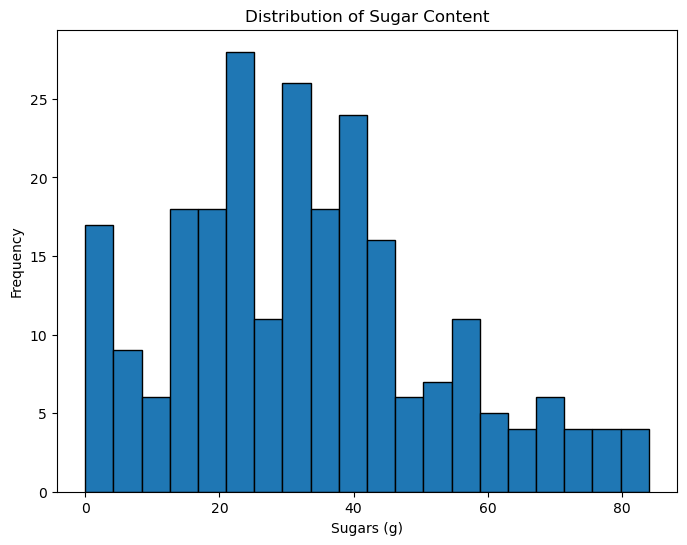

In [26]:
# Histogram of Sugars
plt.figure(figsize=(8,6))
plt.hist(df['Sugars (g)'], bins=20, edgecolor='black')
plt.title('Distribution of Sugar Content')
plt.xlabel('Sugars (g)')
plt.ylabel('Frequency')
plt.show()

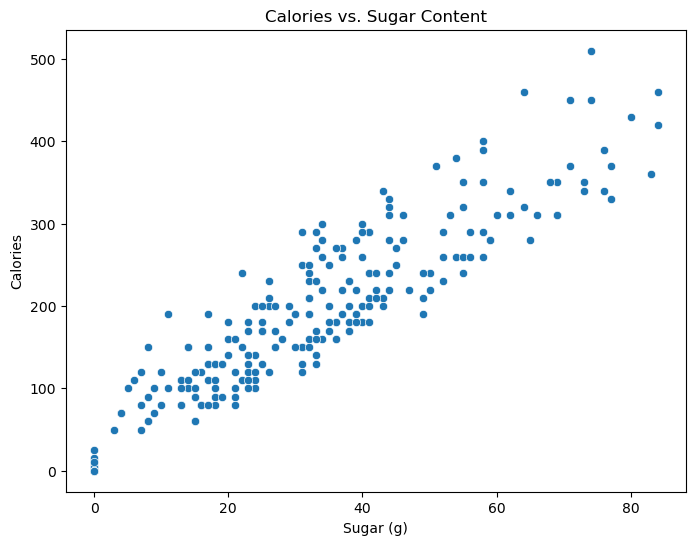

In [37]:
# Scatter plot between Calories and Sugar
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Sugars (g)', y='Calories')
plt.title('Calories vs. Sugar Content')
plt.xlabel('Sugar (g)')
plt.ylabel('Calories')
plt.show()

Visualizes if more sugar = more calories.

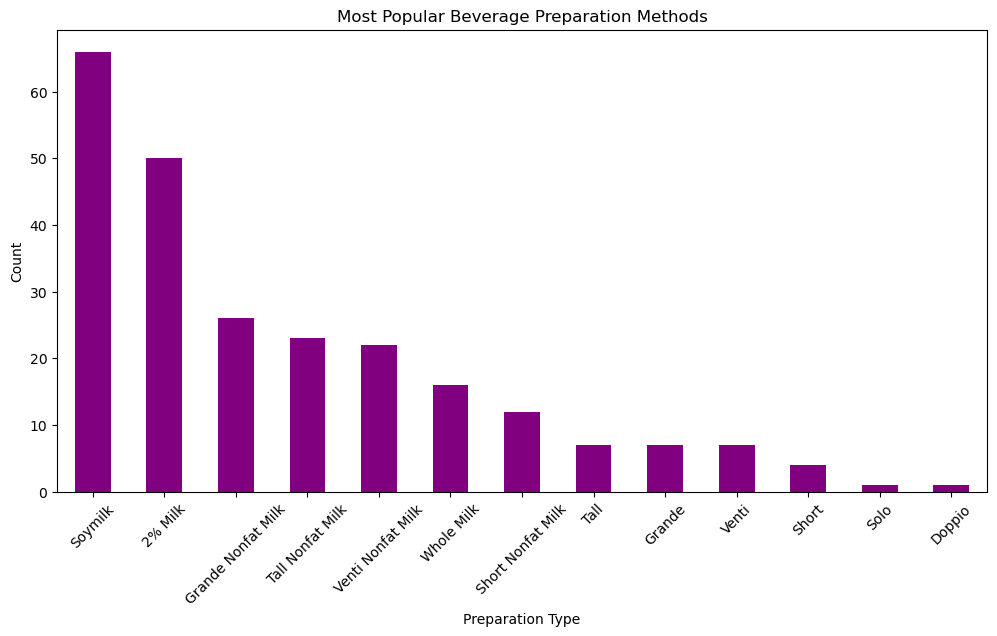

In [38]:
# Beverage Preparation Popularity
plt.figure(figsize=(12,6))
df['Beverage_prep'].value_counts().plot(kind='bar', color='purple')
plt.title('Most Popular Beverage Preparation Methods')
plt.xlabel('Preparation Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Shows preferred ways people like their drink.

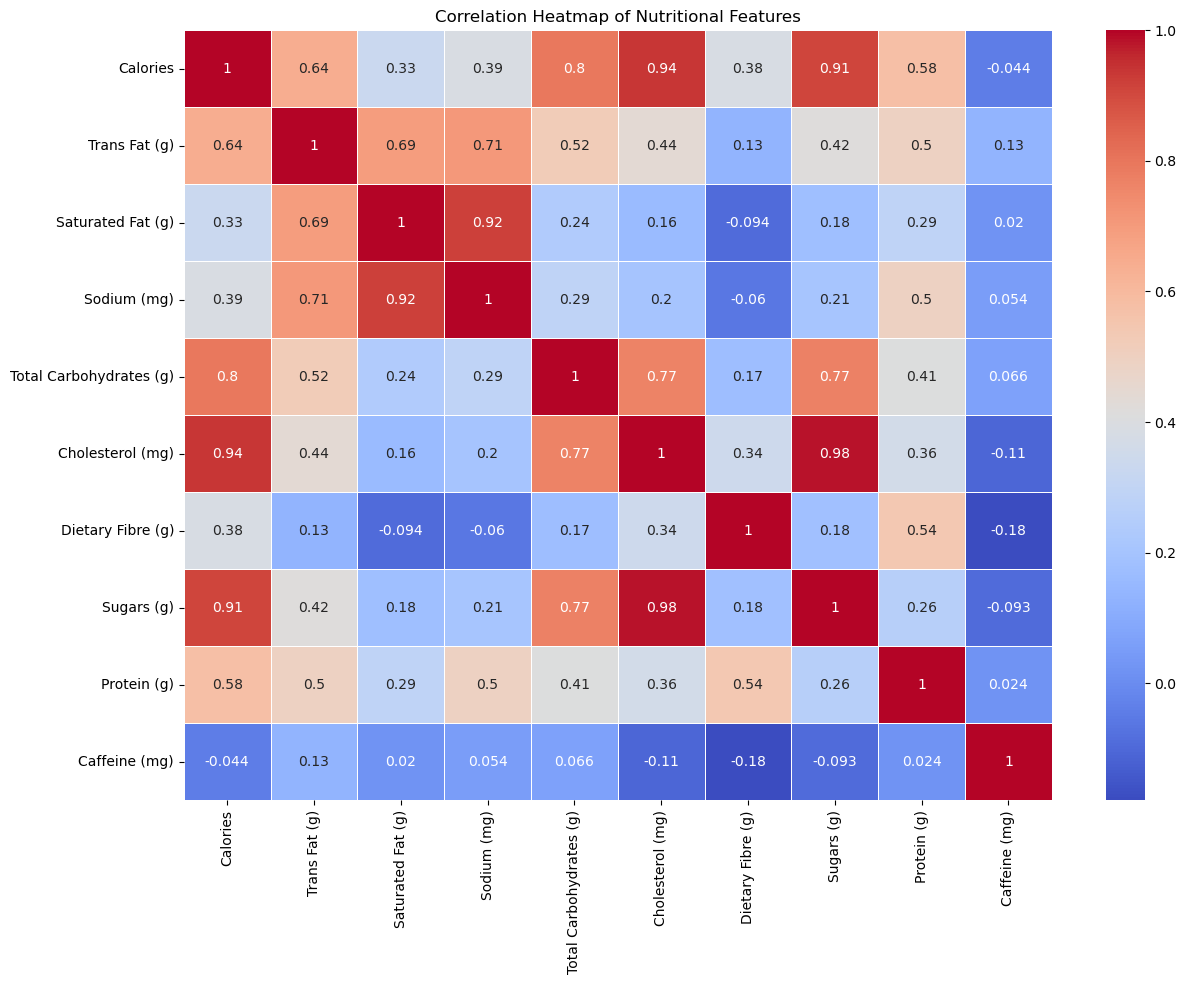

In [39]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Now plot correlation heatmap
plt.figure(figsize=(14,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Nutritional Features')
plt.show()


In [41]:
# Healthy Drinks: Less than 150 Calories, High Protein (>10g)
healthy_drinks = df[(df['Calories'] < 150) & (df['Protein (g)'] > 10)]
healthy_drinks[['Beverage', 'Calories', 'Protein (g)']]

,Beverage,Calories,Protein (g)
10,Caffè Latte,130,13.0
60,Skinny Latte (Any Flavour),120,12.0


drinks that are low-calorie but high in protein — good for health lovers.

In [42]:
# Coffee Lover Drinks: High Caffeine (>200mg), Low Calories (<150)
coffee_lovers = df[(df['Caffeine (mg)'] > 200) & (df['Calories'] < 150)]
coffee_lovers[['Beverage', 'Calories', 'Caffeine (mg)']]

,Beverage,Calories,Caffeine (mg)
1,Brewed Coffee,4,260.0
2,Brewed Coffee,5,330.0
3,Brewed Coffee,5,410.0
42,Caffè Americano,15,225.0
43,Caffè Americano,25,300.0
156,Iced Brewed Coffee (With Classic Syrup),130,235.0


Drinks with strong caffeine but not heavy on calories.

In [44]:
# Sugar Avoiders: Sugar less than 10g
sugar_avoiders = df[df['Sugars (g)'] < 10]
sugar_avoiders[['Beverage', 'Sugars (g)', 'Calories']]


,Beverage,Sugars (g),Calories
0,Brewed Coffee,0,3
1,Brewed Coffee,0,4
2,Brewed Coffee,0,5
3,Brewed Coffee,0,5
4,Caffè Latte,9,70
5,Caffè Latte,9,100
6,Caffè Latte,4,70
9,Caffè Latte,6,110
12,Caffè Latte,8,150
40,Caffè Americano,0,5


Drinks safe for low-sugar diets.

# Insights Summary


### 1. Beverage Variety & Popularity:
Starbucks offers a wide variety of beverages across categories like Coffee, Tea, and Frappuccinos.
Coffee is the most offered beverage category, indicating it as the core of Starbucks' business.
Within drink preparations, "Grande" size is the most common, suggesting it as a customer favorite.
Based on frequency in the dataset, classic drinks like Latte, Cappuccino, and Brewed Coffee appear most often, suggesting high popularity.

### 2. Calorie and Sugar Distribution:
The majority of Starbucks drinks fall between 100–300 calories.
Frappuccino-based beverages are often the most calorie-dense, frequently exceeding 400 calories.
Sugar content is strongly correlated with calorie content — drinks with high sugar typically have high calories.
Some beverages contain over 70g of sugar, far exceeding recommended daily intake.

### 3. Caffeine Content Insights:
Brewed Coffees and Espresso shots offer the highest caffeine concentrations.
Importantly, high caffeine does not always mean high calories — black coffees have high caffeine with low calorie counts.
Average caffeine content is significantly higher for Coffee and Espresso categories compared to others.

### 4. Health-Conscious Recommendations:
Best Drinks for Health Lovers:
Low-calorie (under 150 calories) and high-protein drinks like certain protein shakes and light lattes are ideal.
Best Drinks for Coffee Lovers:
Highly caffeinated yet low-calorie drinks include Brewed Coffees and Americanos, which deliver caffeine without the calorie load.
Best Drinks for Sugar Avoiders:
Beverages with less than 10g of sugar include Black Coffee, Espresso, and certain Iced Teas, making them suitable for low-sugar diets.

### 5. Business and Health Implications:
Starbucks can further promote its low-calorie, high-protein options to health-conscious customers.
There's an opportunity to create "low-sugar" versions of popular Frappuccinos without sacrificing flavor, targeting broader health-focused audiences.
Marketing highly caffeinated, low-calorie coffees may appeal to students, professionals, and fitness-focused customers.

## Summary:
The Starbucks beverage menu balances between indulgent high-calorie options and health-conscious beverages.
Data-driven insights can help Starbucks better target customers based on health preferences, caffeine needs, and sugar awareness.

In [46]:
# Export cleaned dataset to CSV for Tableau
df.to_csv('starbucks_cleaned.csv', index=False)
print("Cleaned dataset exported successfully for Tableau!")


Cleaned dataset exported successfully for Tableau!
